<a href="https://colab.research.google.com/github/Hallymhwangbo/2020-AI_minseo/blob/master/02_3_Data_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## 데이터 준비하기

In [30]:
noise = 0.08

In [31]:
X, Y = (make_circles(n_samples=1000, noise = noise))

In [32]:
X.shape

(1000, 2)

In [33]:
x1 = X[:, 0]
x2 = X[:, 1]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
x_train.shape

(800, 2)

In [36]:
x_test.shape

(200, 2)

In [37]:
y_train.shape

(800,)

In [38]:
y_test.shape

(200,)

## 모델 정의하고 학습하기

In [39]:
model1 = SVC(kernel ='rbf')

In [40]:
%%time
model1.fit(x_train, y_train)

CPU times: user 14 ms, sys: 0 ns, total: 14 ms
Wall time: 18.5 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
  import matplotlib as mpl
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
  np.arange(ymin, ymax, (ymax-ymin)/1000))
  ZZ = np.reshape(model.predict(
  np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
  fig = plt.figure(figsize=(7,7))
  plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.title(title)
  plt.xlabel("x1")
  plt.ylabel("x2")

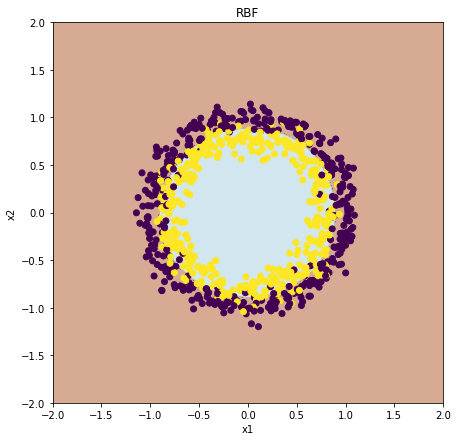

In [42]:
PlotSVM(x_train, y_train, model1, title='RBF')

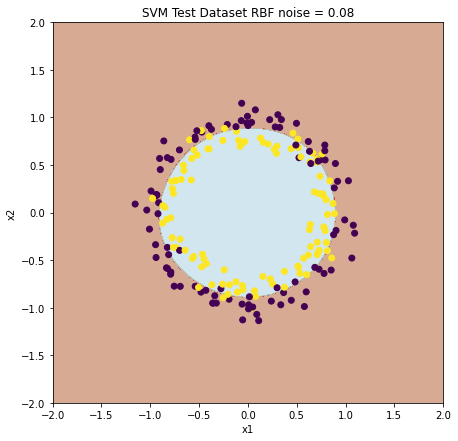

In [43]:
PlotSVM(x_test, y_test, model1,title="SVM Test Dataset RBF noise = {}".format(noise))

## 예측하고 평가하기

In [44]:
predictions = model1.predict(x_test)

In [45]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

In [46]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

In [47]:
model1.score(x_test, y_test)

0.865

## Confusion Matrix

In [48]:
import pandas as pd

In [49]:
conf_matrix = pd.crosstab(y_test, predictions)
print(conf_matrix)

col_0   0   1
row_0        
0      84  12
1      15  89


In [50]:
y_test.shape

(200,)

In [51]:
predictions.shape

(200,)